# Aproximação Trigonométrica

Julia Graziosi Ortiz
    
Katlyn Ribeiro Almeida
    
Matheus Araújo Pinheiro

In [1]:
import numpy as np
import matplotlib.pyplot as plt

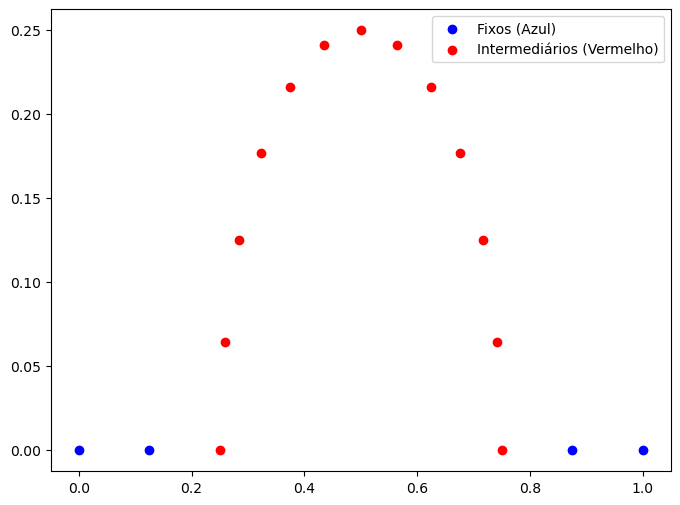

In [2]:
# Definir o número de pontos intermediários
N = 12 # Deve ser par
m = 4  # Número de funções trigonométricas na combinação linear

# Definir os pontos fixos
pontosFixos = np.array([[0, 0], [1/8, 0], [7/8, 0], [1, 0]])

# Definir os pontos intermediários no semicírculo
def pontos_intermediarios(N):
    points = []
    for k in range(N + 1):
        x = 1/2 + 1/4 * np.cos(np.pi * (1 - k/N))
        y = 1/4 * np.sin(np.pi * (1 - k/N))
        points.append([x, y])
    return np.array(points)

pontosIntermediarios = pontos_intermediarios(N)

# Unir os pontos fixos e intermediários
pontosDados = np.vstack((pontosFixos, pontosIntermediarios))

# Extraindo as coordenadas x e f(x)
x_vals = pontosDados[:, 0]
f_vals = pontosDados[:, 1]

plt.figure(figsize=(8, 6))

# Plotar os pontos fixos e intermediários com cores diferentes
plt.scatter(pontosFixos[:, 0], pontosFixos[:, 1], color = 'b', label="Fixos (Azul)")
plt.scatter(pontosIntermediarios[:, 0], pontosIntermediarios[:, 1], color = 'r', label="Intermediários (Vermelho)")
plt.legend()


In [3]:
# Definir as funções g_0(x) = 0, g_1(x) = 1, e g_2k(x) = sin(kx), g_2k+1(x) = cos(kx)
def g_par(k, x):
        return np.sin(k * x)
def g_impar(k, x):
    return np.cos((k-1) * x)
# Função para calcular o produto interno <f, g> para dois vetores em x_vals
def produto_interno(f_vals, g_vals):
    return np.dot(f_vals, g_vals)

# Montar a matriz M, onde M[i,j] = <g_i, g_j>
M = np.zeros((2 * m + 2, 2 * m + 2))

for i in range(2 * m + 2):
    if (i % 2 == 0):
        g_i_vals = np.array([g_par(i, x) for x in x_vals])
    else:
        g_i_vals = np.array([g_impar(i, x) for x in x_vals])
    for j in range(2 * m + 2):
        if (j % 2 == 0):
            g_j_vals = np.array([g_par(j, x) for x in x_vals])
        else:
            g_j_vals = np.array([g_impar(j, x) for x in x_vals])
        M[i, j] = produto_interno(g_i_vals, g_j_vals)
        
# Montar o vetor b, onde b[i] = <f, g_i>
b = np.zeros(2 * m + 2)

for i in range(2 * m + 2):
    if (i % 2 == 0):
        g_i_vals = np.array([g_par(i, x) for x in x_vals])
    else:
        g_i_vals = np.array([g_impar(i, x) for x in x_vals])
    b[i] = produto_interno(f_vals, g_i_vals)

# Ignorar a primeira linha e coluna de M para que a matriz seja inversível
M_reduced = M[1:, 1:]  # Seleciona todas as linhas a partir da segunda
b_reduced = b[1:]      # Seleciona todos os elementos a partir do segundo

# Resolver o sistema reduzido
a_coeffs = np.linalg.solve(M_reduced, b_reduced)

# Exibir o vetor a_coeffs
print(a_coeffs)

# Função de aproximação usando os coeficientes encontrados
def F(x, a_coeffs):
    approximation = 0
    for k in range(1, 2 * m + 2): # Iniciar de 1 até 2m
        if (k % 2 == 0):
            approximation += a_coeffs[k - 1] * g_par(k, x)  # Acessar a_coeffs com k-1
        else:
            approximation += a_coeffs[k - 1] * g_impar(k, x)  # Acessar a_coeffs com k-1
    return approximation


[-636.65734617  885.15969521  568.35450432 -526.58918143  240.99751682
   27.45523148 -192.60538228   23.05311504   19.91077156]


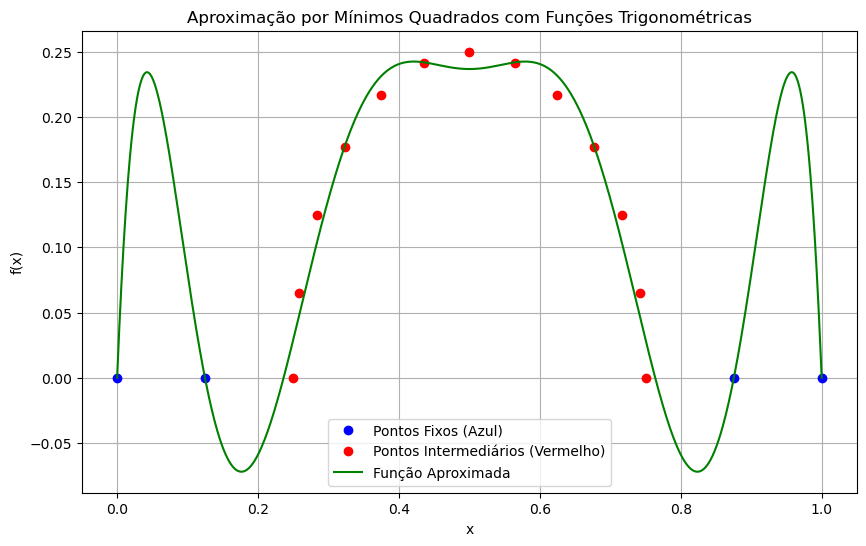

In [4]:
# Plotar os pontos originais e a função aproximada
x_plot = np.linspace(0, 1, 1000)  # Limite ajustado para o intervalo [0, 1]
f_approx = [F(x, a_coeffs) for x in x_plot]

plt.figure(figsize=(10, 6))

# Plotar os pontos fixos e intermediários com cores diferentes
plt.plot(pontosFixos[:, 0], pontosFixos[:, 1], 'bo', label="Pontos Fixos (Azul)")
plt.plot(pontosIntermediarios[:, 0], pontosIntermediarios[:, 1], 'ro', label="Pontos Intermediários (Vermelho)")

# Plotar a função aproximada
plt.plot(x_plot, f_approx, label="Função Aproximada", color='green')

# Configurações adicionais do gráfico
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Aproximação por Mínimos Quadrados com Funções Trigonométricas")
plt.grid(True)
plt.show()
